# Содиков Фарход. ПИ19-1. ML3.1.

## Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## 1. Загрузите датасет breast_cancer.

In [2]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


## 2. Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.

In [3]:
X_2d = X[:, :2]
print(X_2d.shape)
print(y.shape)

(569, 2)
(569,)


## 3. Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=0)

## 4. Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.

In [5]:
clf = SVC(C=0.01, kernel="rbf")
clf.fit(X_train, y_train)

print(f"Точность (тестовая): {clf.score(X_train, y_train)}")
print(f"Точность (обучающая): {clf.score(X_test, y_test)}")

Точность (тестовая): 0.6923076923076923
Точность (обучающая): 0.6666666666666666


## 5. Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):

### a. Собрать больше объектов наблюдения<br>b.Провести обучение на меньшем объеме данных<br>c. Исключить часть признаков из модели<br>d. Добавить новые признаки в модель<br>e. Добавить полиномиальные признаки<br>f. Попробовать более сложные модели<br>g. Попробовать более простые модели<br>h. Увеличить регуляризацию модели<br>i. Уменьшить регуляризацию модели

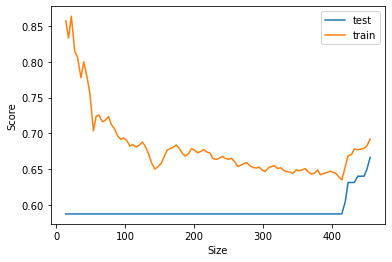

In [6]:
data = np.linspace(len(X_train) // 100 + 10, len(X_train), 100, dtype=int)
test_scores = []
train_scores = []

for i in data:
    clf = SVC(C=0.01, kernel='rbf')

    x_ = X_train[:i]
    y_ = y_train[:i]

    clf.fit(x_, y_)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(x_, y_))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('Size')
ax.set_ylabel('Score')
_ = ax.legend()

### Точность модели маленькая.<br> Ответ: a, f, i

## 6. Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.

In [7]:
clf = SVC(C=0.01, kernel="rbf")
clf.fit(X_train, y_train)

print(f"Точность (тестовая): {clf.score(X_test, y_test)}")
print(f"Точность (обучающая): {clf.score(X_train, y_train)}")

Точность (тестовая): 0.6666666666666666
Точность (обучающая): 0.6923076923076923


### h. Увеличение регуляризации до 100.

In [8]:
clf = SVC(kernel='rbf', C=100)
clf.fit(X_train, y_train)
print(f"Точность (тестовая): {clf.score(X_test, y_test)}")
print(f"Точность (обучающая): {clf.score(X_train, y_train)}")

Точность (тестовая): 0.868421052631579
Точность (обучающая): 0.9142857142857143


#### Вывод: увеличение регуляризации увеличивает точность модели

### f. Использование более сложных моделей (KNeighborsClassifier):

In [9]:
import sklearn.neighbors as neigh

kn = neigh.KNeighborsClassifier(n_neighbors=90, n_jobs=6).fit(X_train,y_train)
print(f"Точность (тестовая): {kn.score(X_test, y_test)}")
print(f"Точность (обучающая): {kn.score(X_train, y_train)}")

Точность (тестовая): 0.8947368421052632
Точность (обучающая): 0.8879120879120879


#### Вывод: результаты стали выше.

### Использование LogReg:

In [10]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=5000, n_jobs=6).fit(X_train, y_train)
print(f"Точность (тестовая): {logr.score(X_test, y_test)}")
print(f"Точность (обучающая): {logr.score(X_train, y_train)}")

Точность (тестовая): 0.8947368421052632
Точность (обучающая): 0.8989010989010989


#### Вывод: результаты стали выше.

## 7. Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

  0%|          | 0/50 [00:00<?, ?it/s]

0.8771929824561403

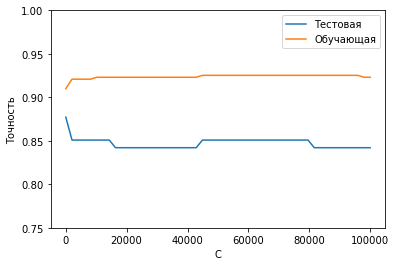

In [11]:
from tqdm.notebook import tqdm
data = np.linspace(1, 100000, 50)

test_scores = []
train_scores = []

for i in tqdm(data):
    clf = SVC(C=i, kernel="rbf")

    clf.fit(X_train, y_train)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="Тестовая")
ax.plot(data, train_scores, label="Обучающая")
ax.set_xlabel('С')
ax.set_ylabel('Точность')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

## 8. Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.

  0%|          | 0/500 [00:00<?, ?it/s]

0.8771929824561403

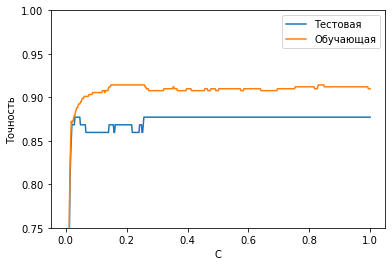

In [12]:
data = np.linspace(0.0001, 1, 500)

test_scores = []
train_scores = []

for i in tqdm(data):
    clf = SVC(C=i, kernel="rbf")
    clf.fit(X_train, y_train)
    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="Тестовая")
ax.plot(data, train_scores, label="Обучающая")
ax.set_xlabel('С')
ax.set_ylabel('Точность')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

#### Вывод: с увеличением регуляризации точность модели на тренируемых данных увеличивается, а на тестовых - уменьшается.

## 9. Найдите методом подбора оптимальное значение параметра регуляризации (примерное).

In [13]:
clf = SVC(kernel='rbf', C=52)
clf.fit(X_train, y_train)
print(f'Точность (тестовая): {clf.score(X_test, y_test)}')
print(f'Точность (обучающая): {clf.score(X_train, y_train)}')

Точность (тестовая): 0.868421052631579
Точность (обучающая): 0.9164835164835164


In [14]:
results = []
for i in range(1, 1000):
    value = i * 0.1
    clf = SVC(kernel='rbf', C=value)
    clf.fit(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    train_acc = clf.score(X_train, y_train)
    results.append((value, test_acc, train_acc))
    
results.sort(key=lambda x: x[1])
print(results[-1])

(51.1, 0.8771929824561403, 0.9164835164835164)


#### Вывод:<br> При регуляризации равной 52 получаем 86% на тестовой выборке и 91% на тренировочной<br>При регуляризации равной 51.1 получаем 87.7% и 91.6%

## 10. Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.

  0%|          | 0/50 [00:00<?, ?it/s]

0.9035087719298246

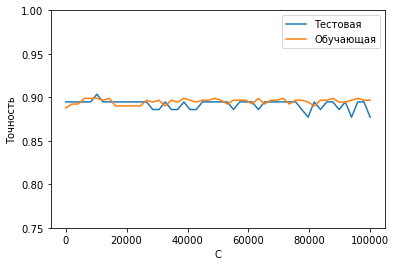

In [15]:
data = np.linspace(1, 100000, 50)

test_scores = []
train_scores = []

for i in tqdm(data):
    clf = SVC(C=i, kernel="linear")

    clf.fit(X_train, y_train)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="Тестовая")
ax.plot(data, train_scores, label="Обучающая")
ax.set_xlabel('С')
ax.set_ylabel('Точность')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

### Оптимальное значение методом подбора.

In [16]:
clf = SVC(kernel='linear', C=9.9)
clf.fit(X_train, y_train)
print(f'Точность (тестовая): {clf.score(X_test, y_test)}')
print(f'Точность (обучающая): {clf.score(X_train, y_train)}')

Точность (тестовая): 0.8947368421052632
Точность (обучающая): 0.8879120879120879


In [17]:
results = []
for i in range(1,100):
    value = i * 0.1
    clf = SVC(kernel='linear', C=value)
    clf.fit(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    train_acc = clf.score(X_train, y_train)
    results.append((value, test_acc, train_acc))
    
results.sort(key=lambda x: x[2])
print(results[-1])

(9.9, 0.8947368421052632, 0.8879120879120879)


#### Вывод: отличие между моделями минимальное.